<a href="https://colab.research.google.com/github/rickiepark/MLQandAI/blob/main/Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 훈련 세트의 통계량으로 검증 세트를 변환해야 하는 이유

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 이진 분류 데이터셋을 만듭니다.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, shift=5, scale=3,
                           class_sep=0.25, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [2]:
# 검증 세트 중에서 양성 클래스와 음성 클래스를 구분합니다.
class_0 = np.where(val_y == 0)[0]
class_1 = np.where(val_y == 1)[0]

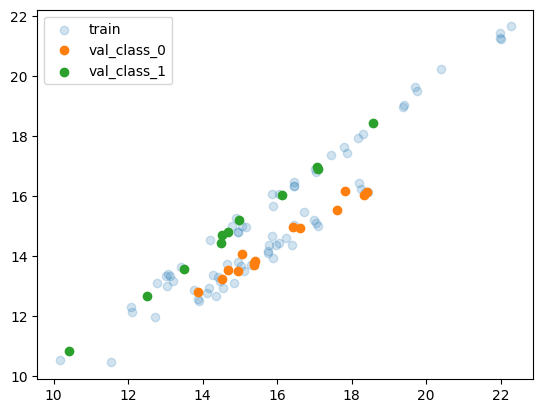

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train_X[:, 0], train_X[:, 1], alpha=0.2, label='train')
plt.scatter(val_X[class_0, 0], val_X[class_0, 1], label='val_class_0')
plt.scatter(val_X[class_1, 0], val_X[class_1, 1], label='val_class_1')
plt.plot()
plt.legend()
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

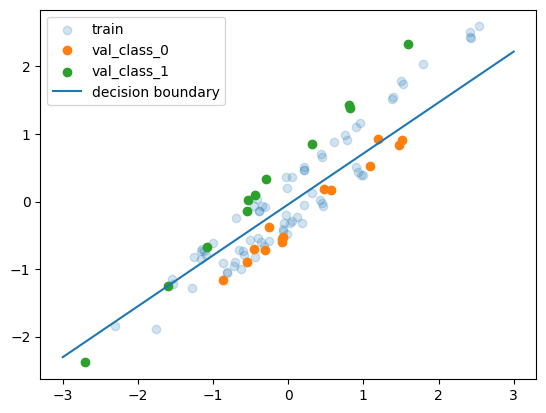

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 훈련 세트와 검증 세트를 각기 변환합니다.
train_X_scaled = StandardScaler().fit_transform(train_X)
val_X_scaled = StandardScaler().fit_transform(val_X)

# 모델을 훈련하고 결정 경계를 그립니다.
model = LogisticRegression()
model.fit(train_X_scaled, train_y)
w1, w2 = model.coef_[0]
b = model.intercept_
x1_vals = np.linspace(-3, 3, 100)
x2_vals = - (w1 / w2) * x1_vals - (b / w2)

plt.scatter(train_X_scaled[:, 0], train_X_scaled[:, 1], alpha=0.2, label='train')
plt.scatter(val_X_scaled[class_0, 0], val_X_scaled[class_0, 1], label='val_class_0')
plt.scatter(val_X_scaled[class_1, 0], val_X_scaled[class_1, 1], label='val_class_1')
plt.plot(x1_vals, x2_vals, label='decision boundary')
plt.legend()
plt.show()

In [6]:
print(model.score(train_X_scaled, train_y), model.score(val_X_scaled, val_y))

0.9733333333333334 0.88


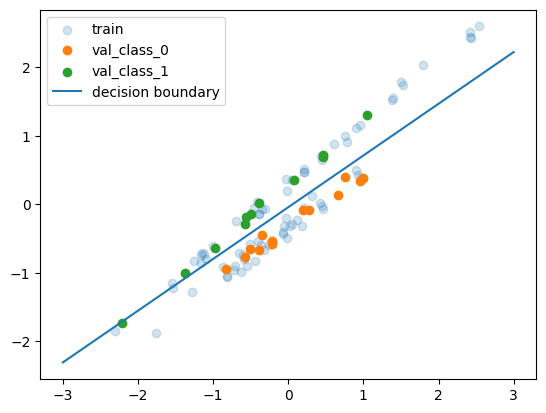

In [7]:
from sklearn.preprocessing import StandardScaler

# 훈련 세트의 통계량으로 검증 세트를 변환합니다.
ss = StandardScaler().fit(train_X)
train_X_scaled = ss.transform(train_X)
val_X_scaled = ss.transform(val_X)

plt.scatter(train_X_scaled[:, 0], train_X_scaled[:, 1], alpha=0.2, label='train')
plt.scatter(val_X_scaled[class_0, 0], val_X_scaled[class_0, 1], label='val_class_0')
plt.scatter(val_X_scaled[class_1, 0], val_X_scaled[class_1, 1], label='val_class_1')
plt.plot(x1_vals, x2_vals, label='decision boundary')
plt.legend()
plt.show()

In [8]:
print(model.score(train_X_scaled, train_y), model.score(val_X_scaled, val_y))

0.9733333333333334 0.96


# 모델을 훈련할 때 판다스 데이터프레임을 넘파이 배열로 바꿔야 하나요?

In [9]:
import pandas as pd

iris = pd.read_csv('https://bit.ly/4awt1w7', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(iris.drop(columns=4), iris[4])

LogisticRegression()

In [11]:
iris.memory_usage(deep=True).sum()

15482

In [12]:
iris.to_numpy().nbytes

6000

# 손실 함수에서 규제 항을 샘플 개수로 나누는 이유는 뭔가요?

$L = \displaystyle \dfrac{1}{2m}\sum_{i=1}^m (\hat{y}_i-y_i)^2 + \dfrac{1}{2m}\lambda \sum_{j=1}^n w_j^2$

# 쿨백 라이블러(KL) 발산이 두 확률 분포의 차이를 계산하는 함수인데요. 왜 분류 작업의 손실 함수는 KL 발산이 아니고 크로스 엔트로피인가요?

$D_{KL}(P||Q) = \displaystyle \sum_x P(x) \;\text{log} \dfrac{P(x)}{Q(x)} = \sum_x P(x)\;\text{log}\,P(x) - \sum_x P(x)\;\text{log}\,Q(x)$

# KFold, StratifiedKFold, GroupKFold의 차이가 뭔지 모르겠어요.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, GroupKFold

model = LinearRegression()
X = pd.DataFrame(np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]]),
                 columns=['x1', 'x2'])
X['group'] = [0, 0, 2, 2, 3, 3]
y = np.array([1, 2, 3, 4, 5, 6])

cross_validate(model, X[['x1', 'x2']], y,
               cv=GroupKFold(n_splits=3), groups=X['group'])

{'fit_time': array([0.06672812, 0.02805805, 0.02810287]),
 'score_time': array([0.00654173, 0.0165    , 0.04591918]),
 'test_score': array([1., 1., 1.])}

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

gs = GridSearchCV(model, {'alpha': [0.1, 0.01, 0.001]},
                  cv=GroupKFold(n_splits=3))
gs.fit(X[['x1', 'x2']], y, groups=X['group'])

GridSearchCV(cv=GroupKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001]})

# 사이킷런에서 그리드서치를 수행할 때 여러 모델을 탐색할 수 있나요?

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC())])

param_grid = [
    {'model': [SVC()], 'model__C': [0.1, 1, 10]},
    {'model': [DecisionTreeClassifier()], 'model__max_depth': [5, 10, 15]}
    ]

gs = GridSearchCV(pipe, param_grid)
gs.fit(train_X, train_y)
gs.best_params_

{'model': SVC(), 'model__C': 10}

# RNN에서는 타임스텝 횟수만큼 뉴런이 있나요?

In [16]:
import torch.nn as nn

rnn = nn.RNN(10, 8)
for w in rnn.all_weights[0]:
    print(w.shape)

torch.Size([8, 10])
torch.Size([8, 8])
torch.Size([8])
torch.Size([8])


# 배치 정규화와 층 정규화는 뭐가 다른가요?

$\hat{x_i} = \dfrac{x_i-\mu}{\sqrt{\sigma^2+\epsilon}}$

$y_i = \gamma \hat{x_i} + \beta$

In [17]:
import torch

torch.manual_seed(42)

input = torch.rand(2, 3, 5, 5)
bn = nn.BatchNorm2d(3)
output = bn(input)
print(input[:, 0].mean().item(), input[:, 0].std().item())
print(output[:, 0].mean().item(), output[:, 0].std().item())

0.5263965129852295 0.2915319800376892
-1.4305115314527939e-07 1.0100919008255005


In [18]:
print(bn.weight.shape, bn.bias.shape)

torch.Size([3]) torch.Size([3])


In [19]:
input = torch.rand(2, 5, 10)
ln = nn.LayerNorm(10)
output = ln(input)
print(input[:, 0].mean().item(), input[:, 0].std().item())
print(output[:, 0].mean().item(), output[:, 0].std().item())

0.4404122829437256 0.287844717502594
5.960464477539063e-08 1.0259109735488892


In [20]:
print(ln.weight.shape, ln.bias.shape)

torch.Size([10]) torch.Size([10])
